In [252]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [256]:
directory = './formated'

mySeries = []
namesofMySeries = []
counter=0
for filename in os.listdir(directory):
    
    if filename.endswith(".csv") :
        df = pd.read_csv(directory+"/"+filename)
        df = df.loc[:,["Y(hoy)"]]
        # While we are at it I just filtered the columns that we will be working on

        # ,set the date columns as index
        # and lastly, ordered the data according to our date index
        mySeries.append(df)
        df = pd.read_csv(directory+"/"+filename)

        df = df.loc[:,["Y(ayer)"]]
        mySeries.append(df)



        namesofMySeries.append(filename)
        namesofMySeries.append(filename)
        counter+=1




In [257]:
print(len(mySeries))
print(namesofMySeries)
print('ejemplo_random.csv' in namesofMySeries)

62
['evolucion_diaria_intensidad.2021.08.17-00.01.01.csv', 'evolucion_diaria_intensidad.2021.08.17-00.01.01.csv', 'evolucion_diaria_intensidad.2022.03.17-00.01.01.csv', 'evolucion_diaria_intensidad.2022.03.17-00.01.01.csv', 'evolucion_diaria_intensidad.2022.05.30-00.01.01.csv', 'evolucion_diaria_intensidad.2022.05.30-00.01.01.csv', 'evolucion_diaria_intensidad.2022.05.01-00.01.01.csv', 'evolucion_diaria_intensidad.2022.05.01-00.01.01.csv', 'evolucion_diaria_intensidad.2019.04.17-23.59.01.csv', 'evolucion_diaria_intensidad.2019.04.17-23.59.01.csv', 'evolucion_diaria_intensidad.2018.11.18-00.01.01.csv', 'evolucion_diaria_intensidad.2018.11.18-00.01.01.csv', 'evolucion_diaria_intensidad.2021.06.02-23.59.01.csv', 'evolucion_diaria_intensidad.2021.06.02-23.59.01.csv', 'AAejemplo_random.csv', 'AAejemplo_random.csv', 'evolucion_diaria_intensidad.2019.03.22-00.01.01.csv', 'evolucion_diaria_intensidad.2019.03.22-00.01.01.csv', 'evolucion_diaria_intensidad.2020.11.17-00.01.01.csv', 'evolucion_di

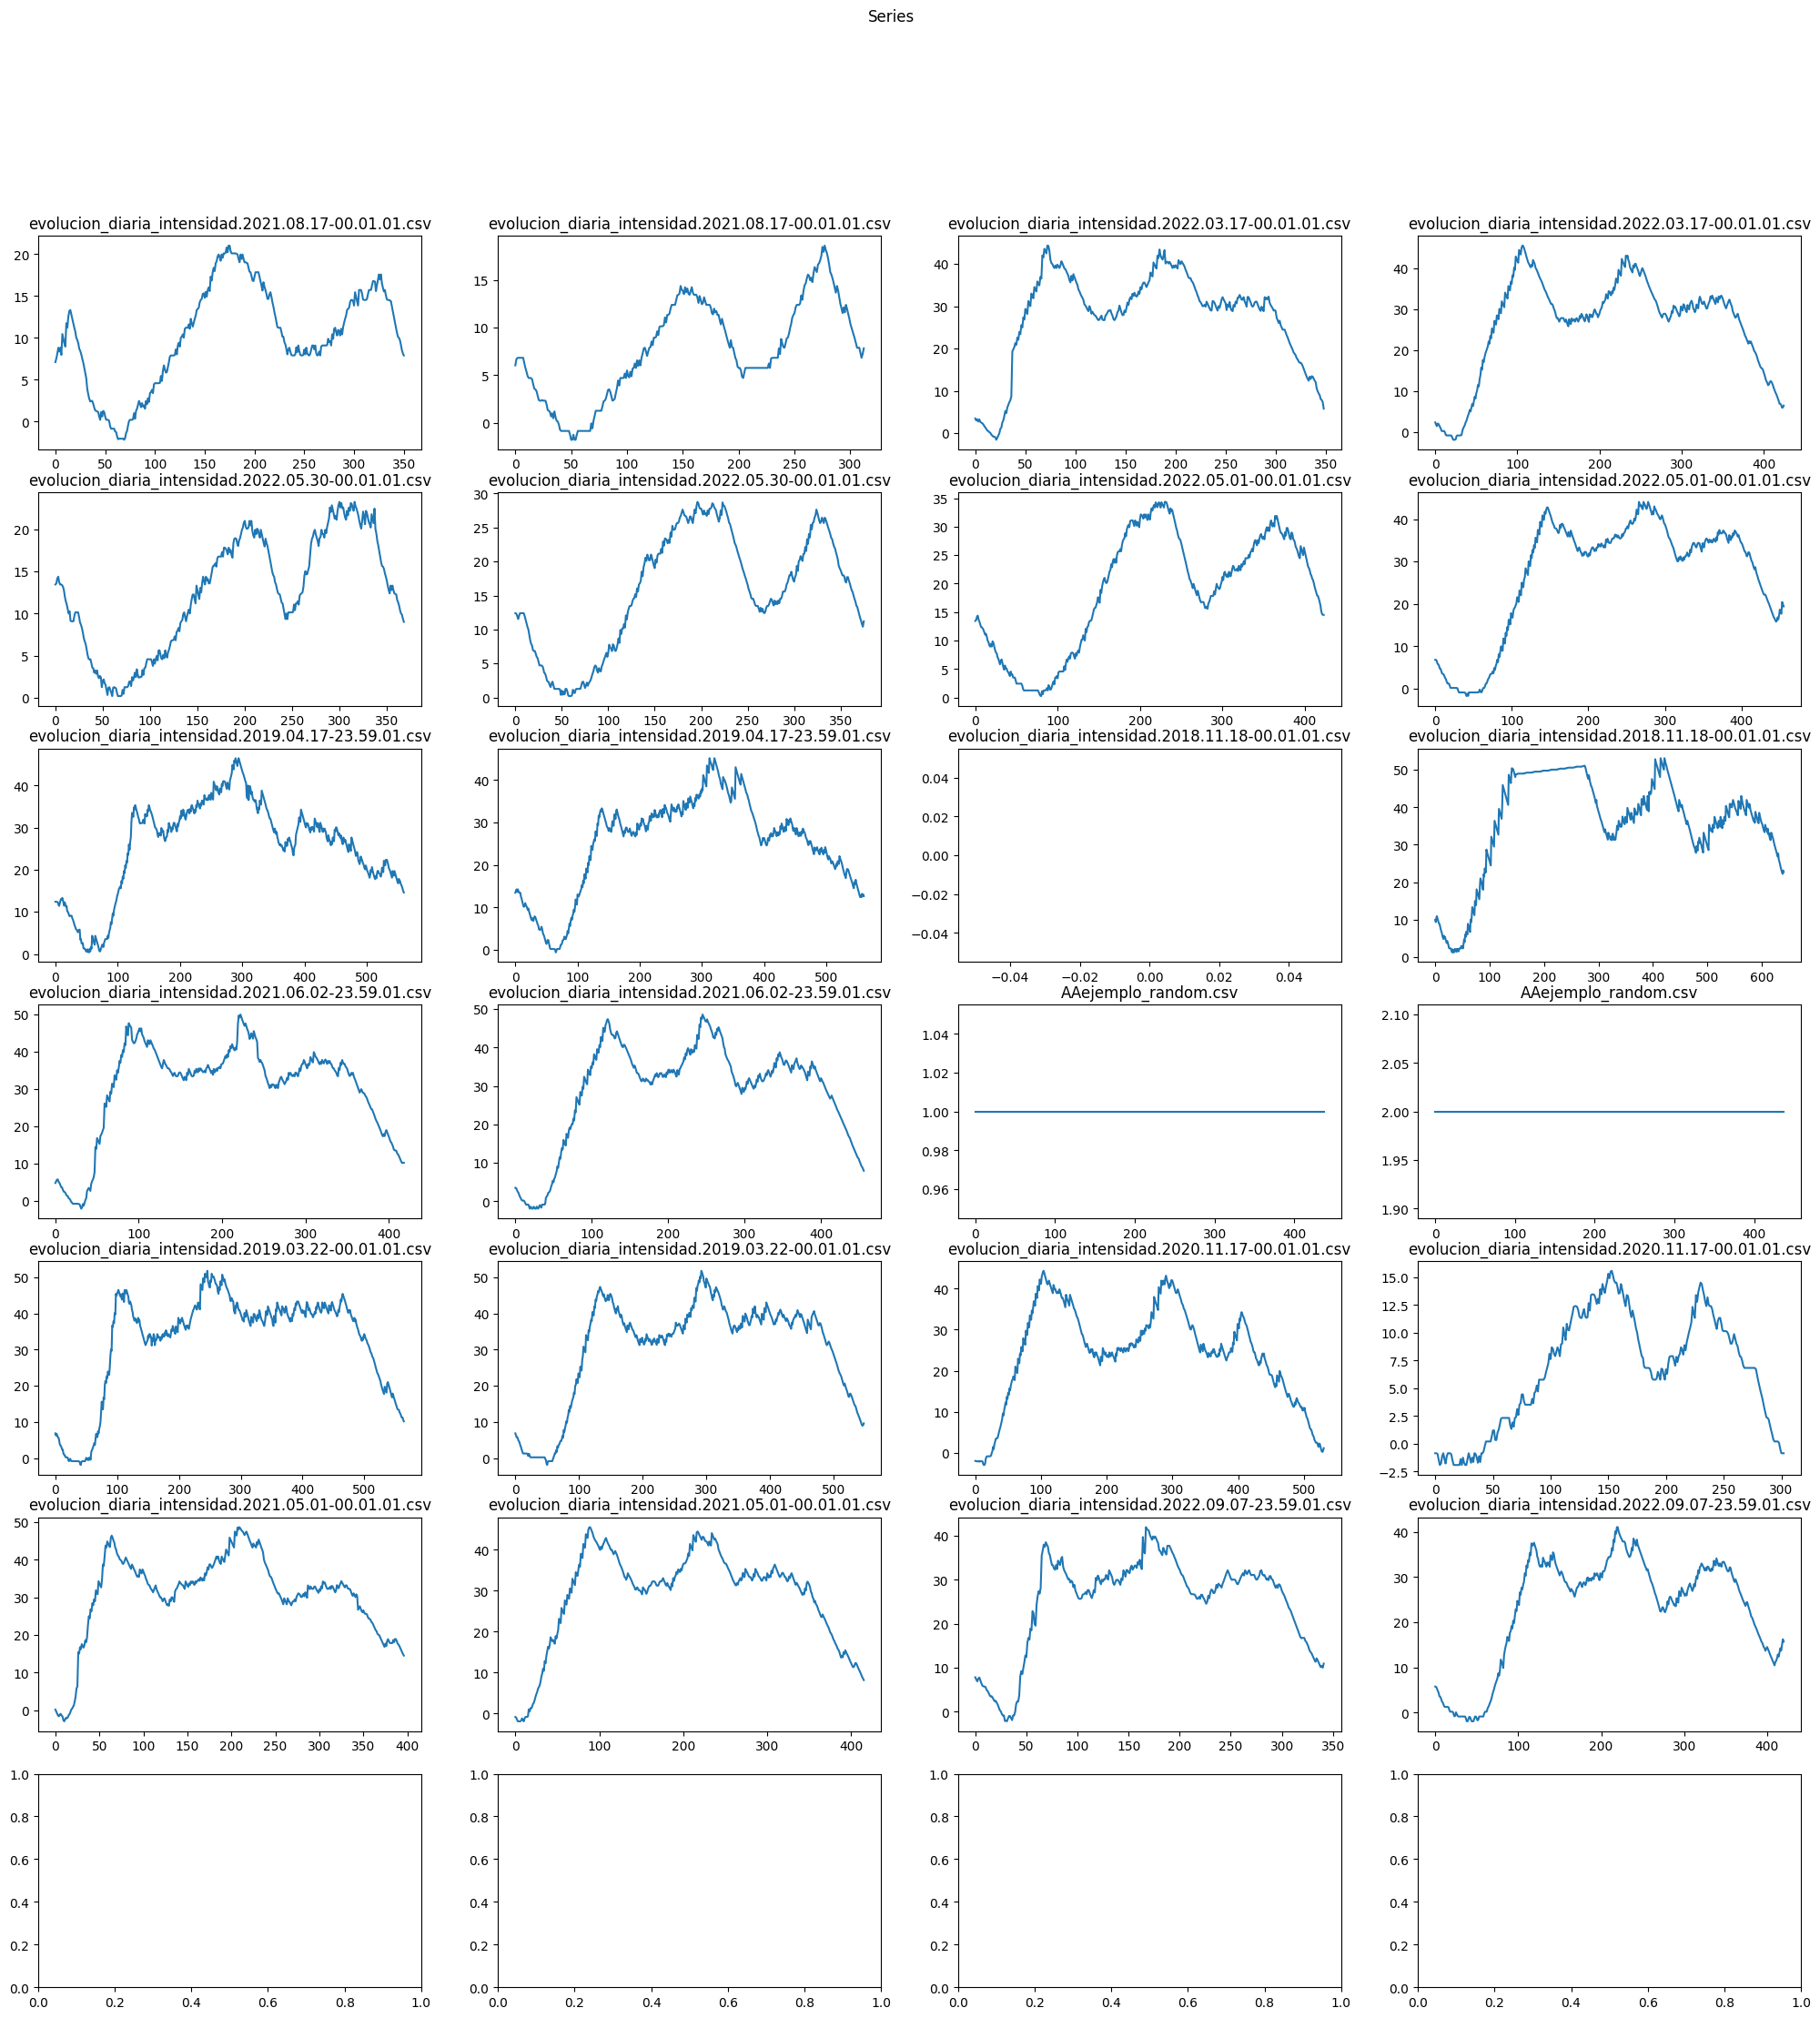

In [258]:
fig, axs = plt.subplots(7,4,figsize=(25,25))
fig.suptitle('Series')
k=0

for i in range(6):
    for j in range(4):
        if i*4+j+1>len(mySeries): # pass the others that we can't fill
            continue


        axs[i, j].plot(mySeries[k].values)
        axs[i, j].set_title(namesofMySeries[k])


        k+=1
plt.show()

In [259]:

ind = 0
series_lengths=[]
for series in mySeries:
    print("["+str(ind)+"] "+str(series.index[0])+" "+str(series.index[len(series)-1]))
    ind+=1
    series_lengths.append(series.index[len(series)-1])


[0] 0 350
[1] 0 350
[2] 0 424
[3] 0 424
[4] 0 375
[5] 0 375
[6] 0 455
[7] 0 455
[8] 0 560
[9] 0 560
[10] 0 640
[11] 0 640
[12] 0 456
[13] 0 456
[14] 0 437
[15] 0 437
[16] 0 564
[17] 0 564
[18] 0 530
[19] 0 530
[20] 0 415
[21] 0 415
[22] 0 420
[23] 0 420
[24] 0 407
[25] 0 407
[26] 0 405
[27] 0 405
[28] 0 567
[29] 0 567
[30] 0 651
[31] 0 651
[32] 0 494
[33] 0 494
[34] 0 427
[35] 0 427
[36] 0 424
[37] 0 424
[38] 0 389
[39] 0 389
[40] 0 618
[41] 0 618
[42] 0 516
[43] 0 516
[44] 0 510
[45] 0 510
[46] 0 518
[47] 0 518
[48] 0 357
[49] 0 357
[50] 0 300
[51] 0 300
[52] 0 431
[53] 0 431
[54] 0 465
[55] 0 465
[56] 0 534
[57] 0 534
[58] 0 542
[59] 0 542
[60] 0 524
[61] 0 524


In [260]:

max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series)-1 == max_len:
        longest_series = series


In [261]:

print(longest_series)


       Y(ayer)
0    11.340705
1    10.943065
2    10.479152
3    10.147785
4    10.015239
..         ...
647        NaN
648        NaN
649        NaN
650        NaN
651        NaN

[652 rows x 1 columns]


In [262]:

problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)
    

In [263]:

def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)
    

In [264]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)

In [265]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

/home/ana/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/ana/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [290]:

som_y =som_y2= math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is
# the square root of the number of series
# for the row and column counts of som
print(som_y2)

som = MiniSom(som_y, som_y2,len(mySeries[0]), sigma=0., learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 5000)


3


In [291]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs= plt.subplots(som_x,som_y,figsize=(25,25))
    fig, plot1= plt.subplots(som_x,som_y,figsize=(25,25))

    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=1),c="blue")
                plot1[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=1),c="blue")

            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

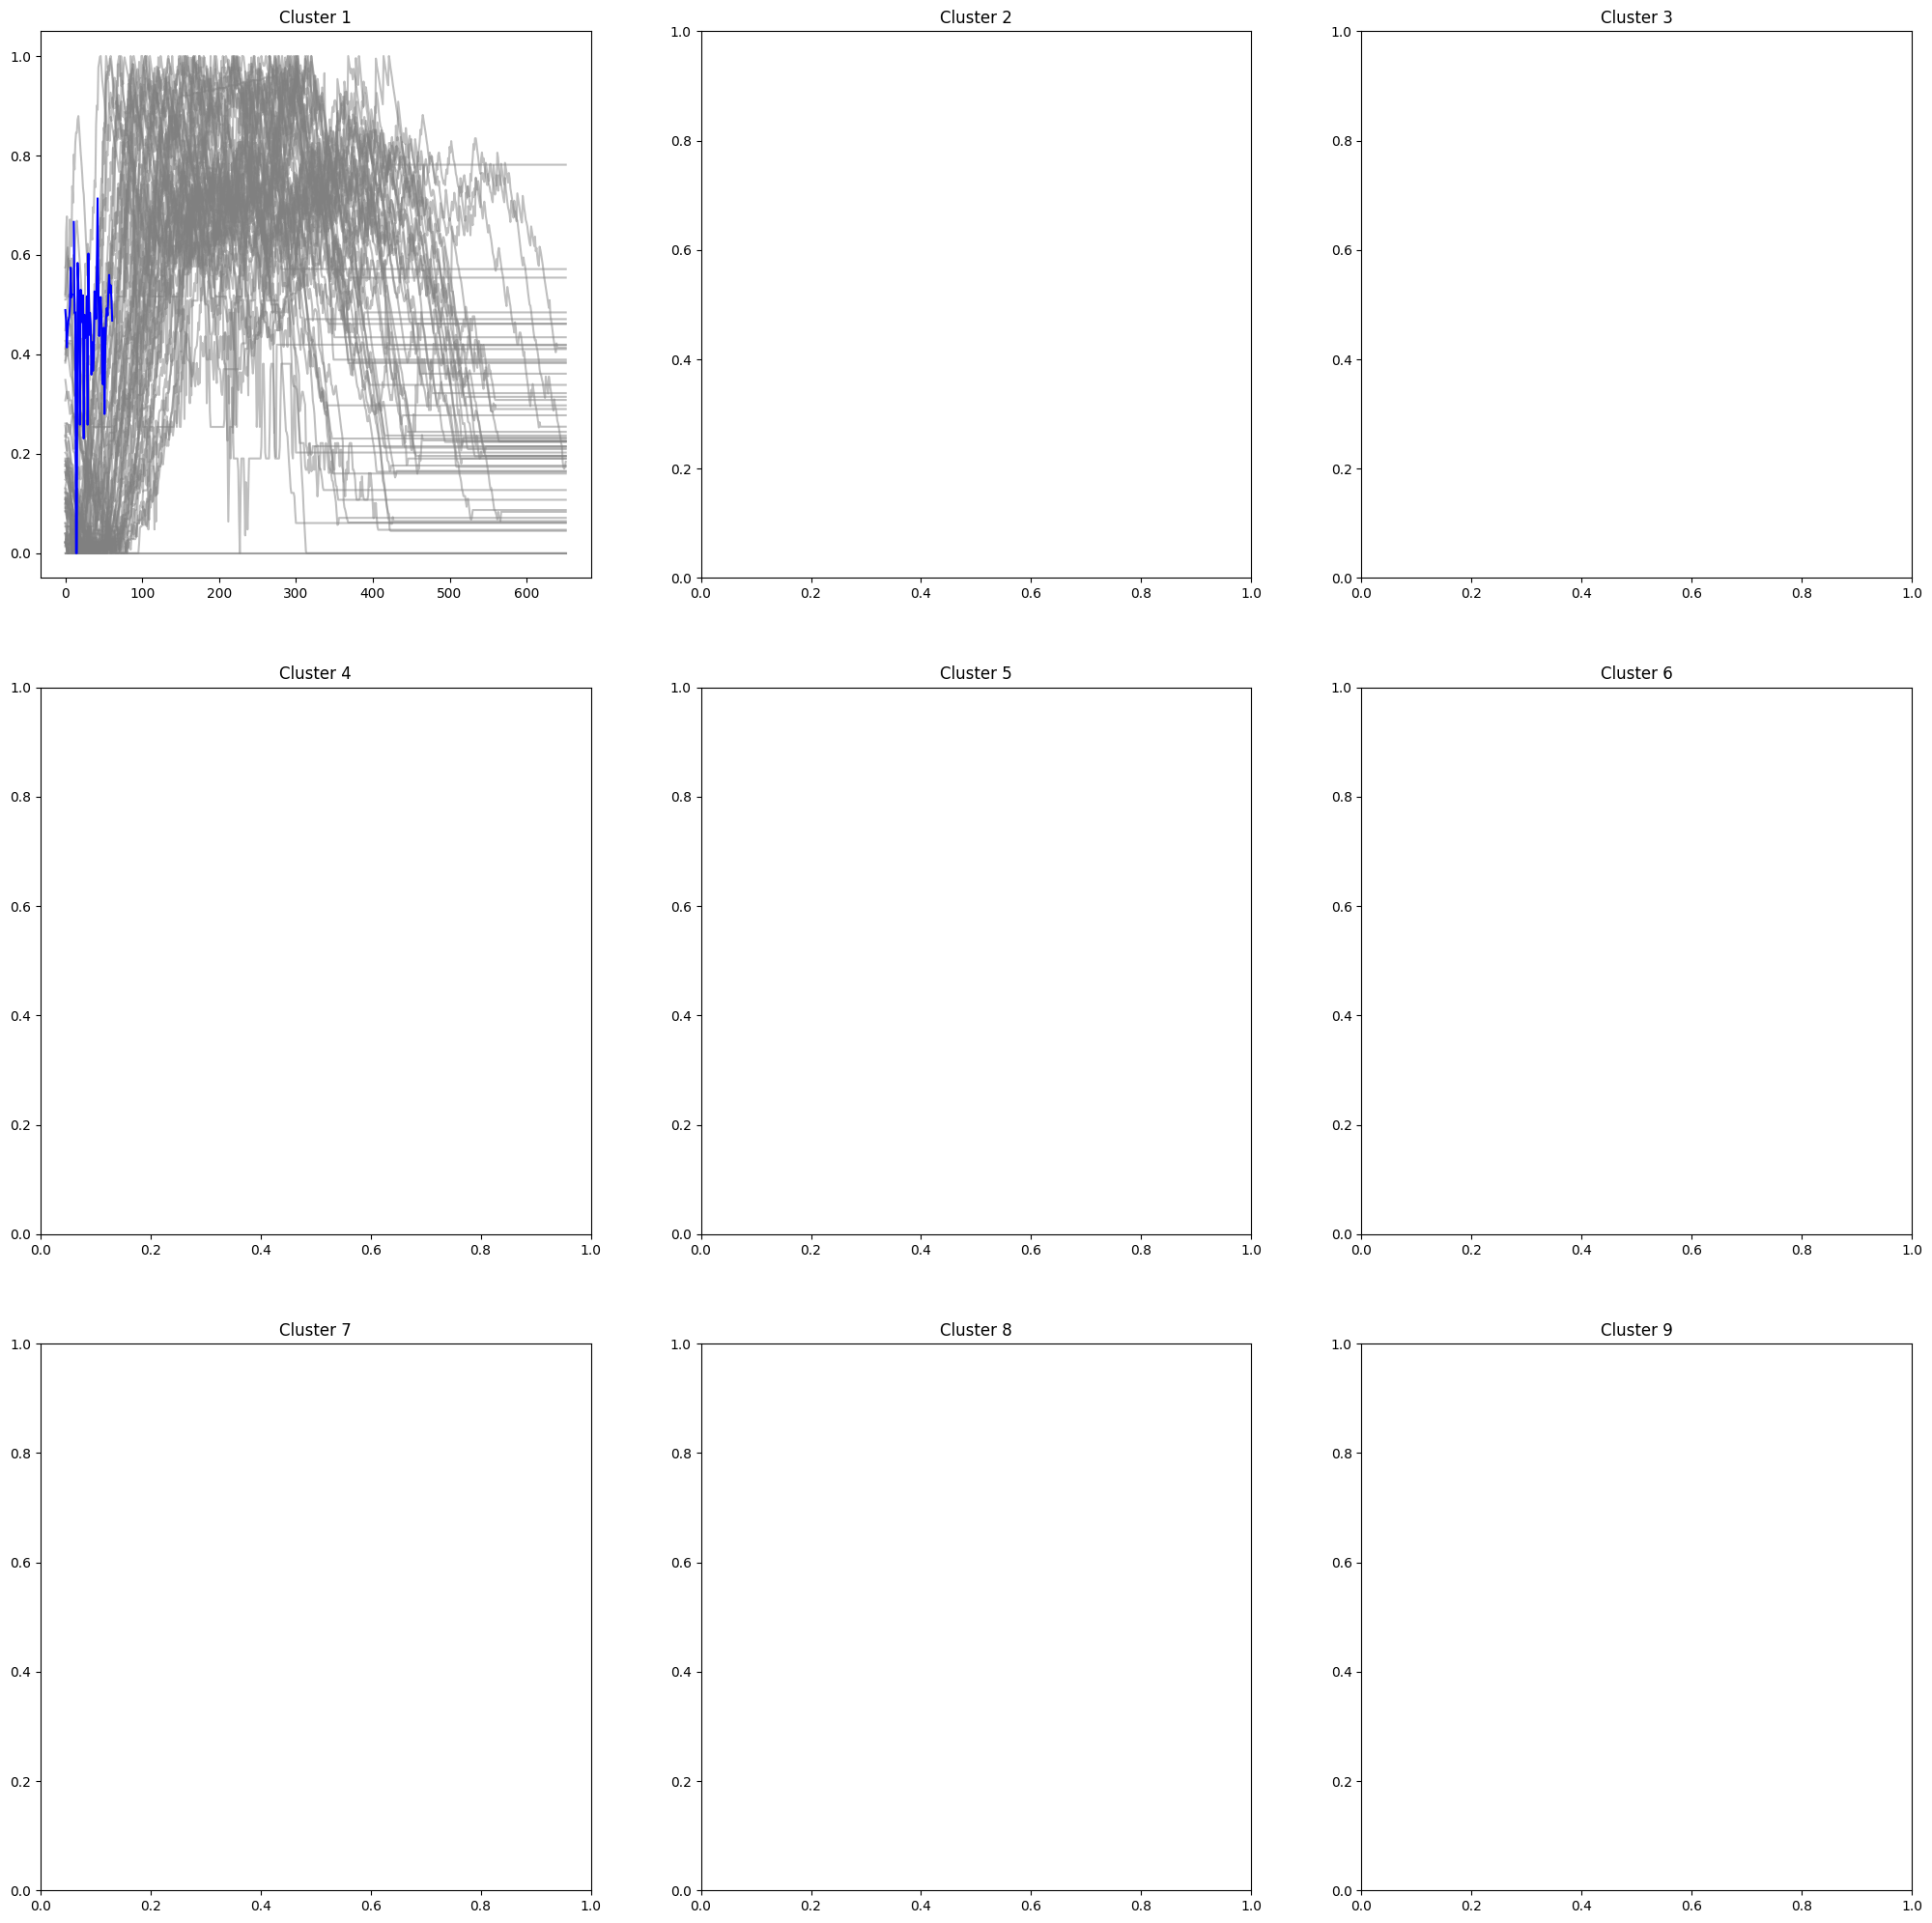

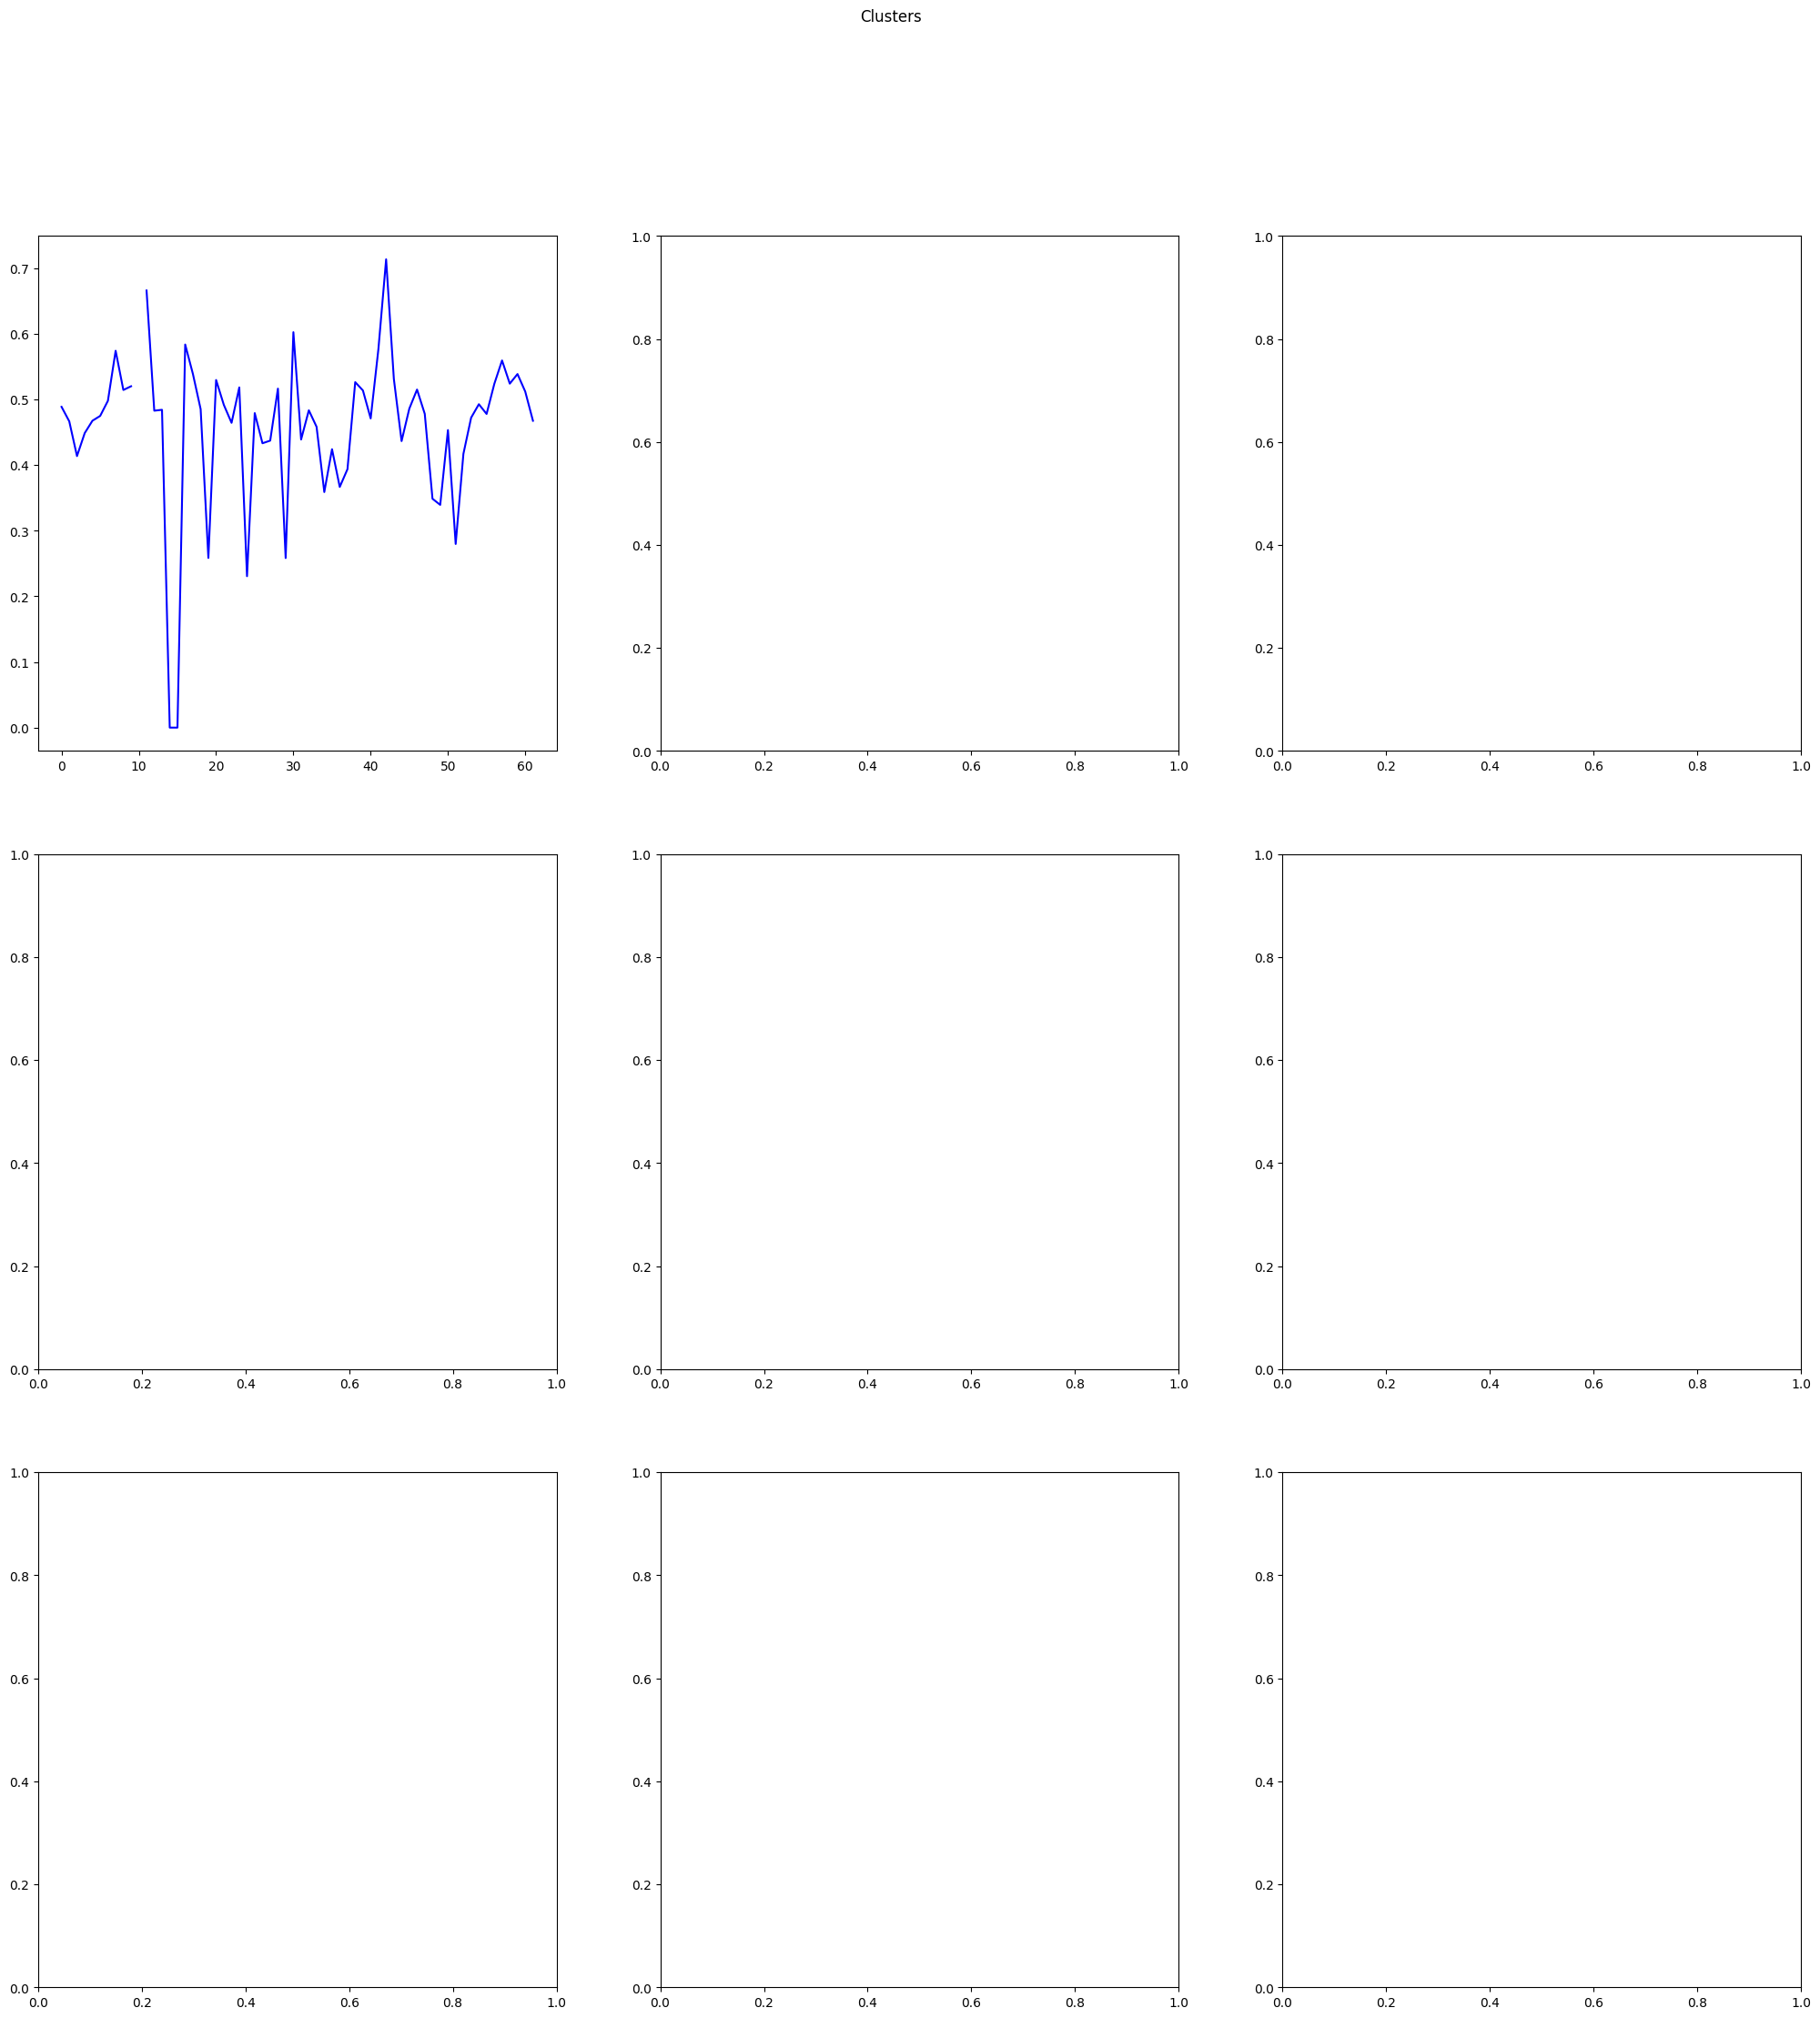

In [292]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)